In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import BayesianGaussianMixture

In [13]:
# Function to convert latitude & longitude to Cartesian coordinates
def latlon_to_xyz(lat, lon):
    lat, lon = np.radians(lat), np.radians(lon)  # Convert degrees to radians
    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)
    return np.vstack((x, y, z)).T  # Shape: (num_points, 3)

In [14]:
data = np.loadtxt("Lat_rev_only_coords.txt")  # Assumes tab or space-delimited file

In [15]:
# Extract latitudes and longitudes
latitudes = data[:, 0]
longitudes = data[:, 1]

# Convert to Cartesian coordinates
points = latlon_to_xyz(latitudes, longitudes)

In [16]:
# Fit Bayesian Gaussian Mixture Model (GMM with automatic cluster selection)
bgmm = BayesianGaussianMixture(n_components=10, covariance_type='full', weight_concentration_prior=1e-2, max_iter=500)
labels = bgmm.fit_predict(points)

C:\Users\Rudko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
# Find the number of clusters (non-negligible weights)
num_clusters = np.sum(bgmm.weights_ > 1e-2)
print(f"Optimal Number of Clusters (GMM on Sphere): {num_clusters}")

Optimal Number of Clusters (GMM on Sphere): 7


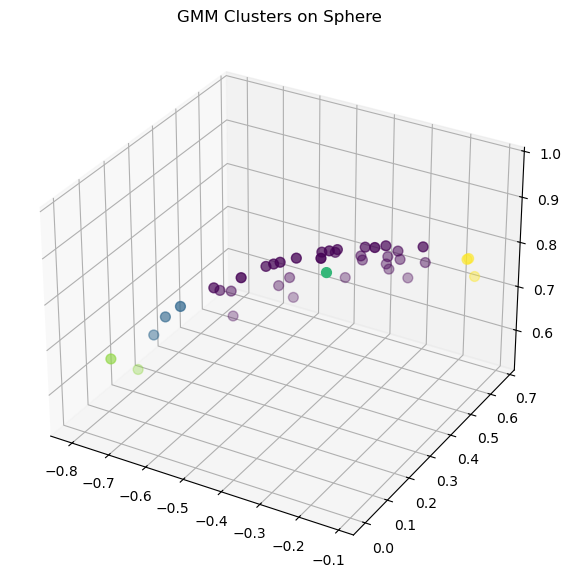

In [18]:
# 3D Visualization of Clusters
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title("GMM Clusters on Sphere")
plt.show()